In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
%matplotlib inline

In [148]:
train = pd.read_csv('C:\Users\Steven\Documents\Machine-Learning-master\Titanic\\train.csv')
test = pd.read_csv('C:\Users\Steven\Documents\Machine-Learning-master\Titanic\\test.csv')

In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [151]:
#most commmon embarked value to fillna

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [152]:
#distribution of cabin values (doesn't seem useful)

train['Cabin'].value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
Name: Cabin, dtype: int64

In [153]:
#fill NaN values

train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

In [154]:
train['Gender'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [155]:
del train['Sex']
del train['PassengerId']
del train['Name']
del train['Ticket']
del train['Cabin']

In [156]:
#null accuracy

train['Survived'].value_counts() / train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [157]:
#split the data to train and test

X, y = train.drop('Survived', axis = 1), train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [158]:
#knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.73094170403587444

In [159]:
#check different values of k

scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.69506726457399104,
 0.67264573991031396,
 0.73094170403587444,
 0.64125560538116588,
 0.70852017937219736,
 0.65919282511210764,
 0.71748878923766812,
 0.6905829596412556,
 0.6905829596412556,
 0.68161434977578472,
 0.69506726457399104,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.66367713004484308,
 0.67713004484304928,
 0.6905829596412556,
 0.6905829596412556,
 0.66816143497757852,
 0.66367713004484308,
 0.64573991031390132,
 0.65919282511210764,
 0.64125560538116588,
 0.65022421524663676,
 0.64573991031390132,
 0.63677130044843044,
 0.62780269058295968]

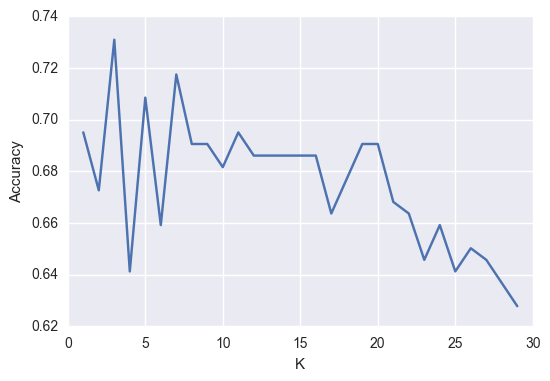

In [160]:
plt.plot(range(1, 30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [161]:
#modified knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.73094170403587444

In [162]:
#can logistic regression perform better?

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.81165919282511212

In [163]:
#scale data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
#knn with scaled data

knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.76681614349775784

In [165]:
#iterative feature selection

for column in X.columns:
    X_subset = X[[column]]
    knn = LogisticRegression()
    knn.fit(X_subset, y)
    print column, knn.score(X_subset, y)

Pclass 0.679012345679
Age 0.616161616162
SibSp 0.616161616162
Parch 0.608305274972
Fare 0.665544332211
Embarked 0.597081930415
Gender 0.786756453423


In [166]:
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']

In [167]:
max_depth_range = range(1, 21)
rmse_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    mse_scores = cross_val_score(treereg, X, y, cv = 10, scoring = 'mean_squared_error')
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))

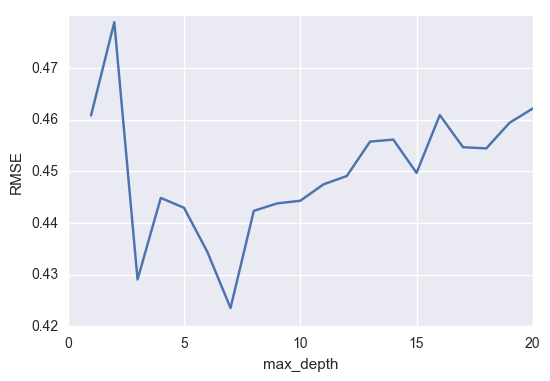

In [168]:
#plot rmse

plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [169]:
#decision tree

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.80269058295964124

In [176]:
#compute the feature importances

pd.DataFrame({'feature': feature_cols, 'importance': tree.feature_importances_}).sort_values('importance')

,feature,importance
3,Parch,0.000000
5,Embarked,0.000000
4,Fare,0.045565
2,SibSp,0.066860
1,Age,0.107014
0,Pclass,0.210663
6,Gender,0.569898


In [171]:
export_graphviz(tree, out_file = 'tree_titanic.dot', feature_names = feature_cols)

In [174]:
estimator_range = range(10, 310, 10)
rmse_scores = []

for estimator in estimator_range:
    forest = RandomForestClassifier(n_estimators = estimator, random_state = 1)
    mse_scores = cross_val_score(forest, X, y, cv = 5, scoring = 'mean_squared_error')
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))

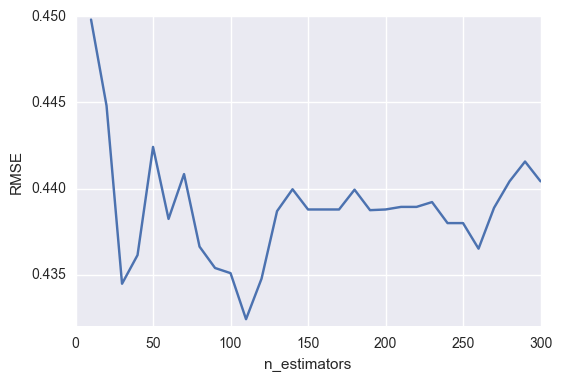

In [175]:
#plot estimators

plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')

In [178]:
#max features

feature_range = range(1, len(feature_cols) + 1)
rmse_scores = []

for feature in feature_range:
    forest = RandomForestClassifier(n_estimators = 150, max_features = feature, random_state = 1)
    mse_scores = cross_val_score(forest, X, y, cv = 10, scoring = 'mean_squared_error')
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))

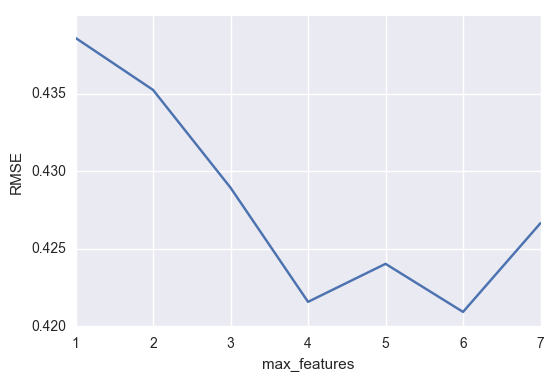

In [179]:
#plot max features

plt.plot(feature_range, rmse_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE')

In [180]:
forest = RandomForestClassifier(n_estimators = 120, max_features = 6, oob_score = True, random_state = 1)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [181]:
scores = cross_val_score(forest, X, y, cv = 10, scoring = 'mean_squared_error')
np.mean(np.sqrt(-scores))

0.41757055228973544

In [182]:
#random forest

random_forest = RandomForestClassifier(n_estimators = 110, max_features = 6, oob_score = True, random_state = 1)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

0.98952095808383234

In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [184]:
#fill NaN values

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [185]:
test['Gender'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [186]:
passenger_id = test['PassengerId']

In [187]:
del test['Sex']
del test['Name']
del test['Ticket']
del test['Cabin']
del test['PassengerId']

In [188]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,34.5,0,0,7.8292,2,1
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,2,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,0,0


In [189]:
result = random_forest.predict(test)

In [190]:
passenger_id = pd.DataFrame(passenger_id, columns = ['PassengerId'])
result = pd.DataFrame(result, columns = ['Survived'])

In [191]:
result = pd.concat([passenger_id, pd.DataFrame(result)], axis = 1, join_axes = [passenger_id.index])
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [192]:
#create submission file

result.to_csv('submission.csv', sep = ',', index = False)